## Homework 3

* Generate dataset using `make_blobs` function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

##### Generating datasets

In [1]:
#importing library
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#generating datasets
X,y=make_blobs(n_samples=2000,n_features=3,random_state=42)

print(X.shape)
print(y.shape)

(2000, 3)
(2000,)


#### Exploring datasets

In [3]:
#importing necessary library
import pandas as pd 
import numpy as np

In [4]:
# loading dataset into pandas
df=pd.DataFrame(X)
df.head()

,0,1,2
0,-8.499150,5.667142,1.509983
1,-9.736497,7.584346,1.997468
2,0.773310,-7.171882,-6.727008
3,1.745282,-5.885697,-7.788316
4,1.583768,-5.288722,-7.983133


In [5]:
#adding target column to dataset and setting the name of columns
df.columns=['feature_1','feature_2','feature_3']
df['target']=y

In [6]:
#checking the dataframe
df.head()

,feature_1,feature_2,feature_3,target
0,-8.499150,5.667142,1.509983,2
1,-9.736497,7.584346,1.997468,2
2,0.773310,-7.171882,-6.727008,1
3,1.745282,-5.885697,-7.788316,1
4,1.583768,-5.288722,-7.983133,1


In [7]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  2000 non-null   float64
 1   feature_2  2000 non-null   float64
 2   feature_3  2000 non-null   float64
 3   target     2000 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 54.8 KB


In [8]:
#checking null value if any
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64

In [9]:
#checking the statistics 
df.describe()

,feature_1,feature_2,feature_3,target
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,-3.185601,3.158252,-0.058714,0.999500
std,4.552214,7.209014,5.037935,0.816599
min,-12.420390,-10.351057,-9.712629,0.000000
25%,-8.239049,-6.206542,-6.163356,0.000000
50%,-2.522167,7.251697,1.965763,1.000000
75%,1.275338,8.652427,4.039708,2.000000
max,4.543077,11.952039,8.012175,2.000000


In [10]:
#checking target values
df.target.unique()

array([2, 1, 0])

So there are total 3 target avaliable

In [11]:
#checking how much value present for each columns
df.groupby(by='target').count()

,feature_1,feature_2,feature_3
target,,,
0,667,667,667
1,667,667,667
2,666,666,666


There is equal distribution of targets for each column values
#### Visualizing the datasets

In [12]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

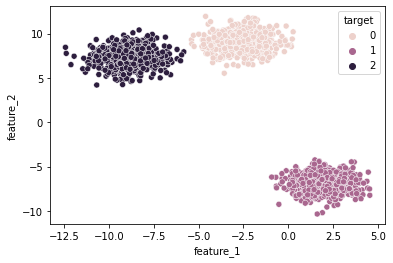

In [13]:

sns.scatterplot(x='feature_1',y='feature_2',hue='target',data=df);

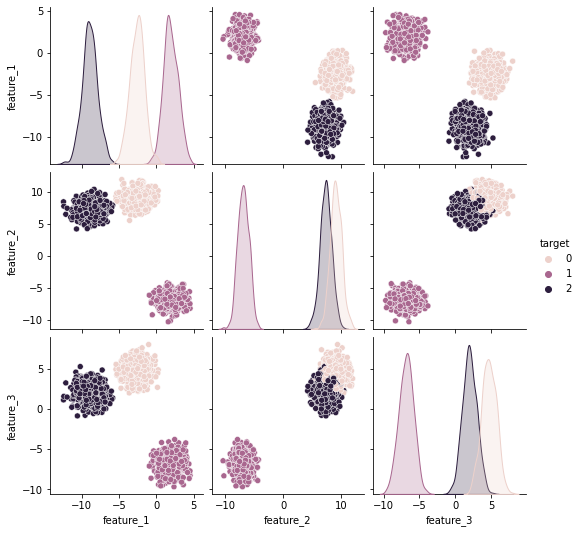

In [14]:
sns.pairplot(df,hue='target')

It is cleared from the visualization that target 1 can be easily classified as it is far away from the other two targets
#### Splitting train-test

In [15]:
#x and y variable
X=df.drop(labels='target',axis=1)
Y=df['target']


In [37]:
#splitting the train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

#### Training the model Using DecisionTreeClassifier

In [17]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=3,random_state=42)

In [18]:
#trainin the model
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
print("Accuracy of train:",clf.score(X_train,Y_train))
print("Accuracy of test:",clf.score(X_test,Y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


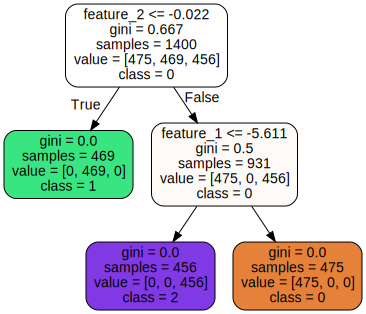

In [20]:
#visualizing the tree
import os
from sklearn.tree import export_graphviz

os.environ['PATH']=';'+r'C:/ProgramData/Anaconda3/Library/bin/graphviz'
import graphviz
tree=export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=['0','1','2'],
                     filled=True, rounded=True)
tree_graph=graphviz.Source(tree)
tree_graph

array([0.49861427, 0.50138573, 0.        ])

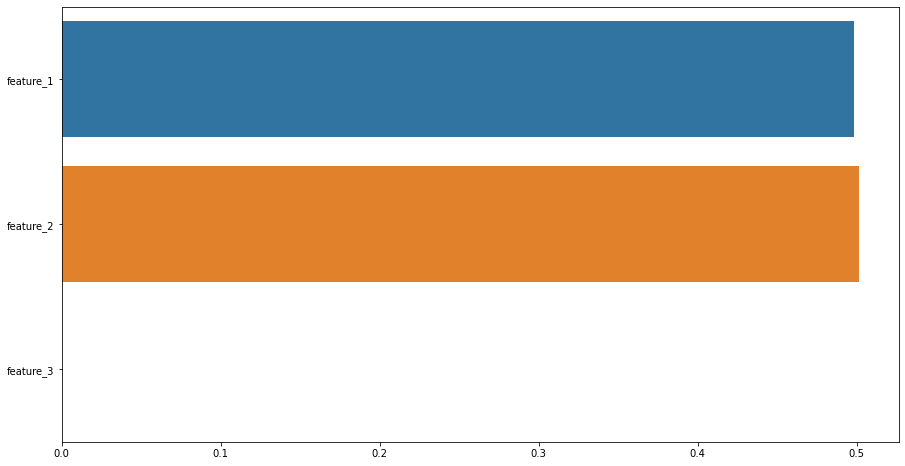

In [36]:
#visualising feature importance
plt.figure(figsize=(15,8))
importance=clf.feature_importances_
sns.barplot(x=importance,y=X.columns)
importance

So feature_1 and feature_2 has same and more importance wheras feature_3 has no importance

In [22]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred_test= clf.predict(X_test)
pred_train=clf.predict(X_train)
print(classification_report(Y_test,pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       210

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [23]:
# on test data
print('Precision:',precision_score(Y_test,pred_test,average='macro'))
print('Accuracy:',accuracy_score(Y_test,pred_test))
print('Recall:',recall_score(Y_test,pred_test,average='macro'))
print('F1 Score:',f1_score(Y_test,pred_test,average='macro'))
print('--------------')
# on train data
print('Precision:',precision_score(Y_train,pred_train,average='macro'))
print('Accuracy:',accuracy_score(Y_train,pred_train))
print('Recall:',recall_score(Y_train,pred_train,average='macro'))
print('F1 Score:',f1_score(Y_train,pred_train,average='macro'))

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
--------------
Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[192,   0,   0],
       [  0, 198,   0],
       [  0,   0, 210]], dtype=int64)

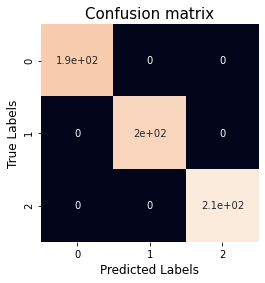

In [25]:
#visualizing confusion matrix
sns.heatmap(cm,square=True,annot=True,cbar=False)
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted Labels',fontsize = 12)
plt.ylabel('True Labels',fontsize = 12)
plt.show()

In [26]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_dict={'criterion':['gini','entropy'],
    'max_depth':range(1,10,2),
           'ccp_alpha':[0.00001,0.001,0.01,0.1,1,2]}
tree_model=DecisionTreeClassifier(random_state=42)

gcv=GridSearchCV(tree_model,param_dict,cv=3)
gcv.fit(X_train,Y_train)
print('Tuned:',gcv.best_params_)
print("Mean of the cv scores:",gcv.best_score_)
print("Train Score:",gcv.score(X_train,Y_train))
print("Test Score:",gcv.score(X_test,Y_test))

Tuned: {'ccp_alpha': 1e-05, 'criterion': 'gini', 'max_depth': 3}
Mean of the cv scores: 1.0
Train Score: 1.0
Test Score: 1.0


####  Training the model Using XGB Booster

In [27]:
#importing necessary library
import xgboost as xgb

In [28]:
#spliting the data
dmatrix_train = xgb.DMatrix(data=X_train, label=Y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=Y_test)

In [29]:
#training the model
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[22:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
#testing the model
preds_train = model.predict(dmatrix_train)
preds_test = model.predict(dmatrix_test)

best_preds_train= np.asarray([np.argmax(line) for line in preds_train])
best_preds_test = np.asarray([np.argmax(line) for line in preds_test])

In [31]:
#on train data
print('Precision:',precision_score(Y_train,best_preds_train,average='macro'))
print('Accuracy:',accuracy_score(Y_train,best_preds_train))
print('Recall:',recall_score(Y_train,best_preds_train,average='macro'))
print('-------------')
#on test data
print('Precision:',precision_score(Y_test,best_preds_test,average='macro'))
print('Accuracy:',accuracy_score(Y_test,best_preds_test))
print('Recall:',recall_score(Y_test,best_preds_test,average='macro'))

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
-------------
Precision: 1.0
Accuracy: 1.0
Recall: 1.0


In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, best_preds_test)
cm

array([[192,   0,   0],
       [  0, 198,   0],
       [  0,   0, 210]], dtype=int64)

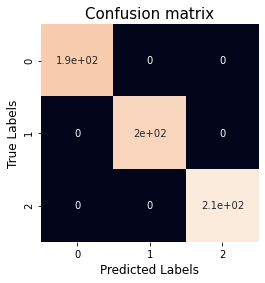

In [33]:
#visualizing confusion matrix
sns.heatmap(cm,square=True,annot=True,cbar=False)
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted Labels',fontsize = 12)
plt.ylabel('True Labels',fontsize = 12)
plt.show()

In [34]:
#Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
}

xgc = XGBClassifier(booster='gbtree',seed=27)
gcv = GridSearchCV(estimator =xgc,param_grid = param_dict, cv=5)
gcv = GridSearchCV(xgc,param_dict,cv=3)

gcv.fit(X_train,Y_train)

print('Tuned:',gcv.best_params_)
print("Mean of the cv scores:",gcv.best_score_)
print("Train Score:",gcv.score(X_train,Y_train))
print("Test Score:",gcv.score(X_test,Y_test))
print("Seconds used for refitting the best model on the train dataset:",gcv.refit_time_)

[22:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[22:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

Tuned: {'max_depth': 3, 'min_child_weight': 1}

Mean of the cv scores: 1.0

Train Score: 1.0

Test Score: 1.0

Seconds used for refitting the best model on the train dataset: 0.23581266403198242